# SEN163A - Fundamentals of Data Analytics
# Assignment 1 - Data consistency
### Ir. Jacopo De Stefani - [J.deStefani@tudelft.nl](mailto:J.deStefani@tudelft.nl)
### Joao Pizani Flor, M.Sc. - [J.p.pizaniflor@tudelft.nl](mailto:J.p.pizaniflor@tudelft.nl)

## Group X
- Student 1 - ''Student ID1''
- Student 2 - ''Student ID2''
- Student 3 - ''Student ID3''
- Student 4 - ''Student ID4''

## Evaluation criteria
The final grade for this assignment will be calculated based on the following criteria:

- $\textbf{Quality of the report}$ - 35\%
    - Reasonable formatting of the document and used citation appropriately
    - Use of proper English (typos, grammar)
    - Code script deliverable
    - Code quality
    - Problem Description
    - Dataset Description
    - Limitations
    - Conclusion/Action recommendations

- $\textbf{Identification of the problems in the database}$ - 65\%


# Data Manipulation

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify as sq

data = pd.read_csv('transactions.csv')
data

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,TRANSFER,0.01,C1231006815,170136.00,170135.99,C52983754,0.01,0.02
1,1,TRANSFER,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,9839.63
2,1,TRANSFER,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,1864.28
3,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,181.00
4,1,TRANSFER,181.00,C840083671,181.00,0.00,C38997010,21182.00,21363.00
...,...,...,...,...,...,...,...,...,...
7734829,743,TRANSFER,0.01,C1162922333,6311409.28,6311409.27,C52983754,13721.94,13721.95
7734830,743,TRANSFER,6311409.28,C1162922333,6311409.28,0.00,C1365125890,351848.64,6663257.91
7734831,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,850002.52
7734832,743,TRANSFER,850002.52,C1280323807,850002.52,-0.01,C873221189,8150751.04,9000753.55


# Dataset Description

In [7]:
## Text description of Data

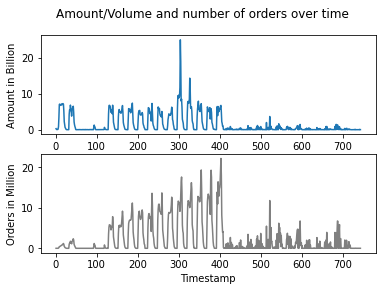

In [8]:
#Calculations
sumamount=data.groupby(['timestamp'])['amount'].sum()
sumtransactions=data.groupby(['timestamp'])['timestamp'].sum()

#Plotting
plt.suptitle('Amount/Volume and number of orders over time')
plt.subplot(2,1,1)
plt.plot(sumamount/1000000000)
plt.ylabel('Amount in Billion')
plt.subplot(2,1,2)
plt.plot(sumtransactions/1000000, color= 'grey')
plt.ylabel('Orders in Million')
plt.xlabel('Timestamp')
plt.show()





In [9]:
data.amount.nlargest(1)

4480645    92445516.64
Name: amount, dtype: float64

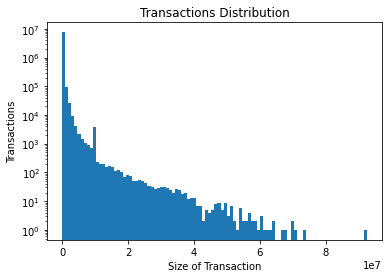

In [10]:
plt.hist(data['amount'], bins= 100, log=True)
plt.title('Transactions Distribution')
plt.xlabel('Size of Transaction')
plt.ylabel('Transactions')

plt.show()

In [11]:
sumorderspercustomer=data.groupby(['nameOrig'])['timestamp'].sum()

volumepercustomer=data.groupby(['nameOrig'])['amount'].sum()

nameOrig
C1715283297    92445516.64
C2127282686    73823490.36
C2044643633    71172480.42
C1425667947    69886731.30
C1584456031    69337316.28
C811810230     67500761.29
C420748282     66761272.21
C1139847449    64234448.19
C300140823     63847992.59
C372535854     63294839.63
Name: amount, dtype: float64


Text(0.5, 0, 'Volume Size')

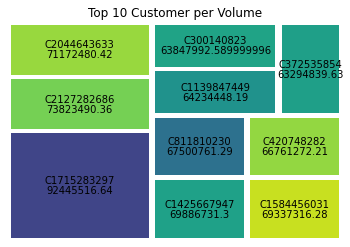

In [12]:
Top10Customer=volumepercustomer.nlargest(10)
print(Top10Customer)

size=[16,8,8,6,6,6,6,6,6,6]

sq.plot(sizes=size, label=Top10Customer.index, pad = True, value= Top10Customer)
plt.axis('off')
plt.title('Top 10 Customer per Volume')
plt.xlabel('Volume Size')
#plt.legend(Top10Customer)

nameOrig
C1286084959    3825
C1374569953    2080
C1934858363    2080
C807221466     2066
C1194120440    2030
C1521592340    2004
C2053049853    1984
C369448390     1980
C614844959     1943
C284997424     1908
Name: timestamp, dtype: int64


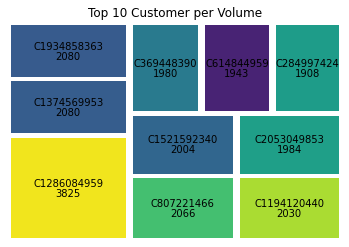

In [13]:
Top10Customer=sumorderspercustomer.nlargest(10)
print(Top10Customer)

sq.plot(sizes=Top10Customer, label=Top10Customer.index, pad = True, value= Top10Customer)
plt.axis('off')
plt.title('Top 10 Customer per Volume')
plt.xlabel('Volume Size')
plt.show()
#plt.legend(Top10Customer)

In [22]:
microtransaction = data[(data.amount < 1)]
microtransaction

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,TRANSFER,0.01,C1231006815,170136.00,170135.99,C52983754,0.01,0.02
6,1,TRANSFER,0.01,C90045638,53860.00,53859.99,C52983754,0.02,0.03
13,1,TRANSFER,0.01,C249177573,20771.00,20770.99,C52983754,0.03,0.04
16,1,TRANSFER,0.01,C1716932897,10127.00,10126.99,C52983754,0.04,0.05
20,1,TRANSFER,0.01,C761750706,450.00,449.99,C52983754,0.05,0.06
...,...,...,...,...,...,...,...,...,...
7734802,741,TRANSFER,0.01,C31496887,144945.34,144945.33,C52983754,13721.90,13721.91
7734808,742,TRANSFER,0.01,C1970706589,4009058.39,4009058.38,C52983754,13721.91,13721.92
7734814,742,TRANSFER,0.01,C1674778854,54652.46,54652.45,C52983754,13721.92,13721.93
7734819,742,TRANSFER,0.01,C1226129332,258355.42,258355.41,C52983754,13721.93,13721.94


In [20]:
microtransaction.nameDest.drop_duplicates()
## find how many senders the receivers have
sumorderspercustomer=data.groupby(['nameOrig'])['nameDest'].value_counts()
sumorderspercustomer


nameOrig     nameDest   
C1000000639  C785826240     1
C1000001337  M216466820     1
C1000001725  M1974356374    1
C1000002591  C503690069     1
C1000003372  C1840417793    1
                           ..
C999998175   C1528914331    1
             C52983754      1
C999999254   C667494566     1
C999999614   M1893160978    1
C999999784   C1952034932    1
Name: nameDest, Length: 7734385, dtype: int64

In [21]:
sumorderspercustomer.nlargest(10)


nameOrig     nameDest   
C1286084959  C2342523425    20
C1004939913  C52983754       2
C1013306757  C52983754       2
C101359786   C52983754       2
C1021736664  C52983754       2
C1023768253  C52983754       2
C1031937059  C52983754       2
C1032040692  C52983754       2
C1038870419  C52983754       2
C1048012418  C52983754       2
Name: nameDest, dtype: int64

In [23]:
sumorderspercustomer=data.groupby(['nameOrig'])['nameDest'].count()


In [ ]:
## Fraud pattern
## --> one sender many destionations  x
## --> many transaction between two destination
## --> many senders one destionations
## --> Many transactions no change in Balance over time
## --> microtransation 50 ct | Big transactiosn 500000 

# Dataset Consistency

No empty cells can be found in the data set

In [ ]:
#empty cells analysis
data.dropna()

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,TRANSFER,0.01,C1231006815,170136.00,170135.99,C52983754,0.01,0.02
1,1,TRANSFER,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,9839.63
2,1,TRANSFER,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,1864.28
3,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,181.00
4,1,TRANSFER,181.00,C840083671,181.00,0.00,C38997010,21182.00,21363.00
...,...,...,...,...,...,...,...,...,...
7734829,743,TRANSFER,0.01,C1162922333,6311409.28,6311409.27,C52983754,13721.94,13721.95
7734830,743,TRANSFER,6311409.28,C1162922333,6311409.28,0.00,C1365125890,351848.64,6663257.91
7734831,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,850002.52
7734832,743,TRANSFER,850002.52,C1280323807,850002.52,-0.01,C873221189,8150751.04,9000753.55


No duplicates can be found

In [ ]:
#Duplicates 
data.drop_duplicates()

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,TRANSFER,0.01,C1231006815,170136.00,170135.99,C52983754,0.01,0.02
1,1,TRANSFER,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,9839.63
2,1,TRANSFER,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,1864.28
3,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,181.00
4,1,TRANSFER,181.00,C840083671,181.00,0.00,C38997010,21182.00,21363.00
...,...,...,...,...,...,...,...,...,...
7734829,743,TRANSFER,0.01,C1162922333,6311409.28,6311409.27,C52983754,13721.94,13721.95
7734830,743,TRANSFER,6311409.28,C1162922333,6311409.28,0.00,C1365125890,351848.64,6663257.91
7734831,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,850002.52
7734832,743,TRANSFER,850002.52,C1280323807,850002.52,-0.01,C873221189,8150751.04,9000753.55


In [ ]:
## Jonathan checks balance = amount

In [ ]:
#check data types and wrong data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7734834 entries, 0 to 7734833
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   timestamp       int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrig  float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 531.1+ MB


In [ ]:
#check zero transactions
zerotransactions = data[(data.amount == 0.00)]
zerotransactions


,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
3326129,212,TRANSFER,0.0,C1510987794,0.0,-0.01,C1696624817,0.00,-0.01
3946645,250,TRANSFER,0.0,C521393327,0.0,0.00,C480398193,0.00,0.00
4570231,279,TRANSFER,0.0,C539112012,0.0,0.00,C1106468520,1092811.49,1092811.49
6763288,387,TRANSFER,0.0,C1294472700,0.0,0.00,C1325541393,14675867.01,14675866.99
7289367,425,TRANSFER,0.0,C832555372,0.0,0.00,C1462759334,76759.90,76759.90
7289369,425,TRANSFER,0.0,C69493310,0.0,0.00,C719711728,4068891.50,4068891.50
7498604,554,TRANSFER,0.0,C10965156,0.0,0.00,C1493336195,694507.82,694507.82
7543410,586,TRANSFER,0.0,C1303719003,0.0,0.00,C900608348,2146988.77,2146988.77
7617487,617,TRANSFER,0.0,C1971175979,0.0,0.00,C1352345416,0.00,0.00
7635818,646,TRANSFER,0.0,C2060908932,0.0,0.00,C1587892888,355276.74,355276.74


In [ ]:
data

NameError: name 'data' is not defined

# Fraud Identification

In [ ]:
### Your code goes here

# Conclusion